In [1]:
import pandas as pd
data = pd.read_csv(r"D:\Data analysis\ML\Titanic_classifiacation\data\Titanic-Dataset.csv")
df= data.copy()

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# It seems that each name has a title, Lets get title and fill age missing depending on title
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [5]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [6]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Don', 'Capt', 'Jonkheer', 'Dona', 'Lady', 'the Countess']
df['Title'] = df['Title'].apply(lambda x: 'rare' if x in rare_titles else x)
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
rare       23
Mlle        2
Mme         1
Ms          1
Name: count, dtype: int64

In [7]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'rare'], dtype=object)

In [8]:
mean_age = df.groupby('Title')['Age'].mean().round(0)
median_age = df.groupby('Title')['Age'].median()

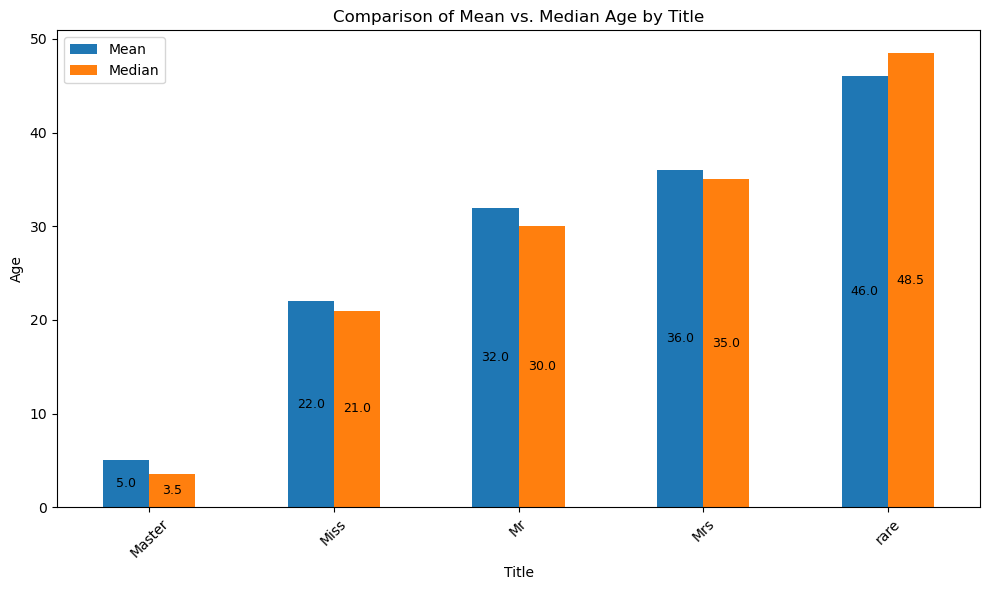

In [9]:
# Lets see which is better to fill out.. Mean or Median

import matplotlib.pyplot as plt

age_state = pd.DataFrame({'Mean': mean_age, 'Median': median_age})
age_bar = age_state.plot(kind='bar', figsize=(10,6))

plt.title('Comparison of Mean vs. Median Age by Title')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()

for container in age_bar.containers:
    age_bar.bar_label(container, fmt='%.1f', label_type='center', fontsize=9)

plt.show()

In [10]:
# I prefer to fill with mean

df['Age'] = df.groupby('Title')['Age'].transform(lambda x : x.fillna(x.mean().round(0)))
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['Pclass_Embarked'] = df['Pclass'].astype(str) + '_' + df['Embarked']
df.drop(['PassengerId','Name', 'Cabin'], axis=1, inplace=True)

In [13]:
df['Pclass_Embarked'].value_counts()

Pclass_Embarked
3_S    353
2_S    164
1_S    127
1_C     85
3_Q     72
3_C     66
2_C     17
2_Q      3
1_Q      2
Name: count, dtype: int64

In [14]:
df.groupby('Pclass')['Embarked'].agg(lambda x:x.mode()[0])

Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object

In [15]:
for idx in df[df['Embarked'].isnull()].index:
    pclass = df.loc[idx, 'Pclass']
    mode_embarked = df[df['Pclass'] == pclass]['Embarked'].mode()[0]
    df.loc[idx, 'Embarked'] = mode_embarked

In [16]:
df['Pclass_Embarked'] = df['Pclass'].astype(str) + '_' + df['Embarked']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   Title            891 non-null    object 
 10  FamilySize       891 non-null    int64  
 11  IsAlone          891 non-null    int32  
 12  FarePerPerson    891 non-null    float64
 13  Pclass_Embarked  891 non-null    object 
dtypes: float64(3), int32(1), int64(5), object(5)
memory usage: 94.1+ KB


In [17]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Title', 'Pclass_Embarked'], drop_first=True)

In [18]:
df.drop(['Ticket', 'Embarked'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    int64  
 3   Age                  891 non-null    float64
 4   SibSp                891 non-null    int64  
 5   Parch                891 non-null    int64  
 6   Fare                 891 non-null    float64
 7   FamilySize           891 non-null    int64  
 8   IsAlone              891 non-null    int32  
 9   FarePerPerson        891 non-null    float64
 10  Title_Miss           891 non-null    bool   
 11  Title_Mr             891 non-null    bool   
 12  Title_Mrs            891 non-null    bool   
 13  Title_rare           891 non-null    bool   
 14  Pclass_Embarked_1_Q  891 non-null    bool   
 15  Pclass_Embarked_1_S  891 non-null    boo

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (668, 21)
Test shape: (223, 21)


In [21]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

print(x_train_scaled.mean().round(2))
print(x_train_scaled.std().round(2))

0.0
1.0


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.8295964125560538

In [24]:
confusion_matrix(y_test, y_pred)

array([[119,  18],
       [ 20,  66]], dtype=int64)

<Axes: title={'center': 'Feature Importance (Logistic Coefficients)'}>

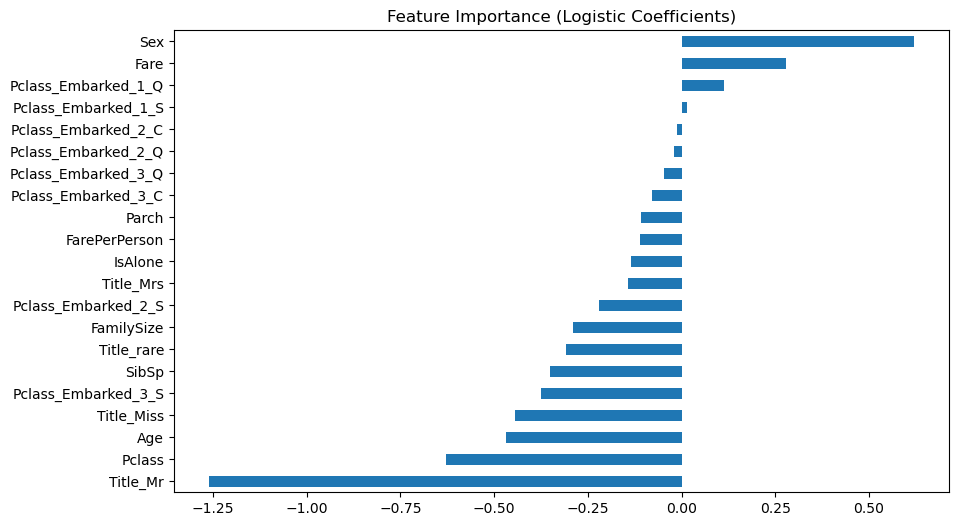

In [25]:
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importance (Logistic Coefficients)')

In [26]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.86,0.87,0.86,137.00
1,0.79,0.77,0.78,86.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.82,0.82,0.82,223.00
weighted avg,0.83,0.83,0.83,223.00


In [27]:
y_probs = model.predict_proba(x_test_scaled)[:, 1]

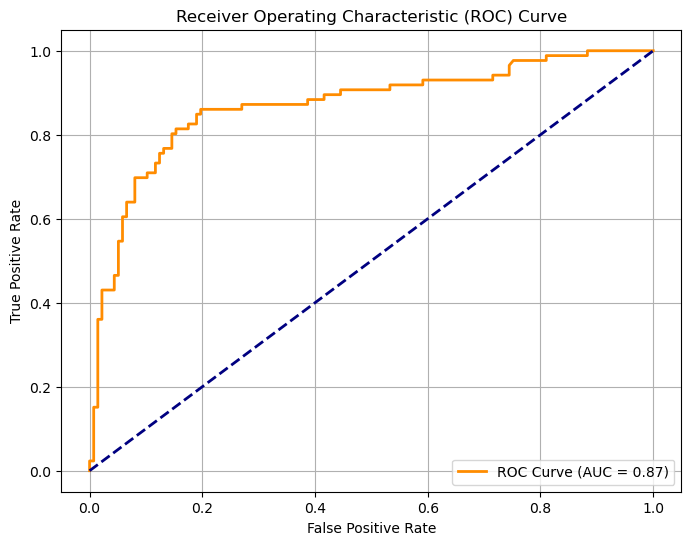

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_rf = model_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.79


In [31]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[116  21]
 [ 25  61]]


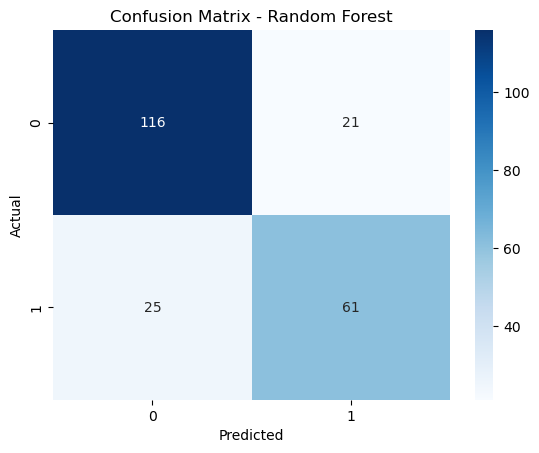

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.74
Recall: 0.71
F1 Score: 0.73


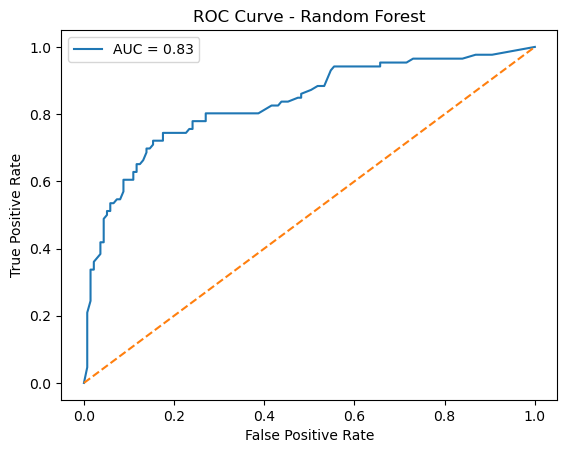

In [34]:
y_probs = model_rf.predict_proba(X_test)[:, 1]  # احتمالية النجاة
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')  # خط عشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)  # عدد الجيران = 5
model_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
y_pred_knn = model_knn.predict(x_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")

KNN Accuracy: 0.79


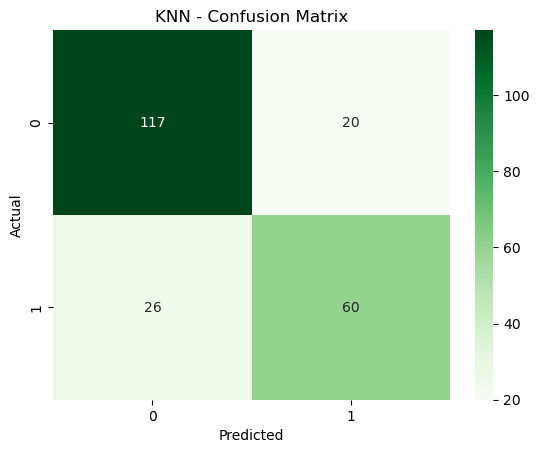

In [37]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Precision: {prec_knn:.2f}")
print(f"Recall: {rec_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")

Precision: 0.75
Recall: 0.70
F1 Score: 0.72


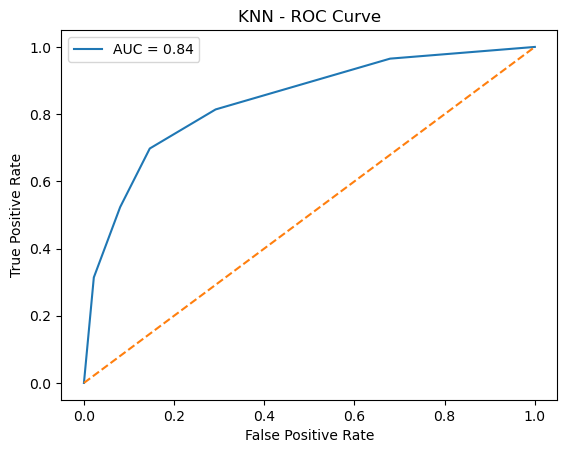

In [39]:
y_probs_knn = model_knn.predict_proba(x_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

plt.plot(fpr_knn, tpr_knn, label=f"AUC = {auc_knn:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN - ROC Curve")
plt.legend()
plt.show()

In [40]:
importances = model_rf.feature_importances_
feat_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(feat_df)

                Feature  Importance
2                   Age    0.189621
5                  Fare    0.148799
8         FarePerPerson    0.135818
10             Title_Mr    0.134460
1                   Sex    0.117535
0                Pclass    0.051452
6            FamilySize    0.036847
20  Pclass_Embarked_3_S    0.035289
9            Title_Miss    0.033296
3                 SibSp    0.022880
11            Title_Mrs    0.021943
4                 Parch    0.020607
7               IsAlone    0.012242
14  Pclass_Embarked_1_S    0.009459
18  Pclass_Embarked_3_C    0.007696
17  Pclass_Embarked_2_S    0.007147
12           Title_rare    0.006439
19  Pclass_Embarked_3_Q    0.006312
15  Pclass_Embarked_2_C    0.001967
16  Pclass_Embarked_2_Q    0.000181
13  Pclass_Embarked_1_Q    0.000011


In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []

for name, model in models.items():
    if name == "KNN":
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        y_proba = model.predict_proba(x_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc
    })

df_results = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.816143   0.771084  0.744186  0.757396  0.867892
1        Random Forest  0.793722   0.743902  0.709302  0.726190  0.832711
2                  KNN  0.793722   0.750000  0.697674  0.722892  0.838016


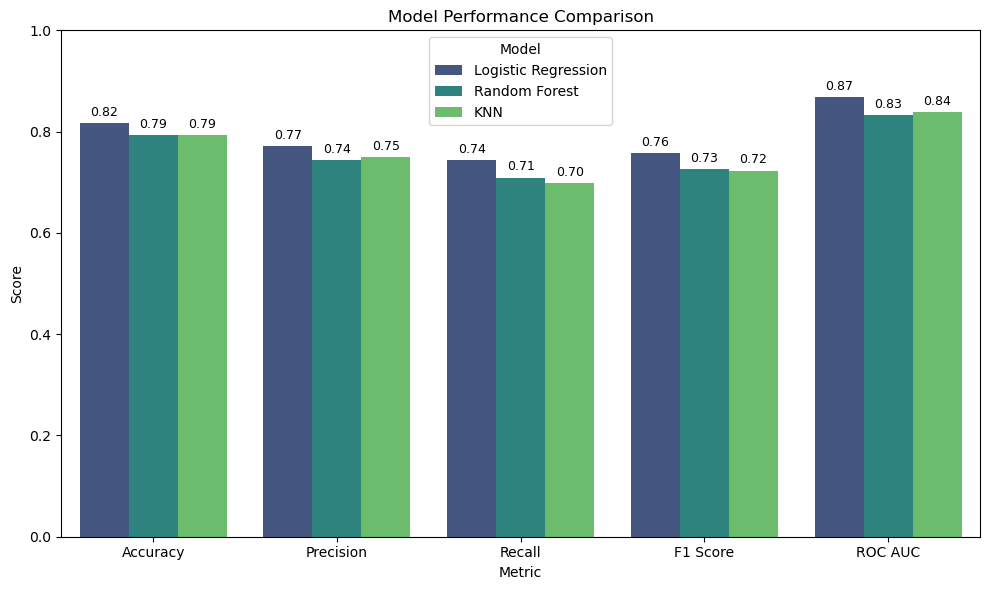

In [46]:
df_long = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_long, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(title="Model")

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

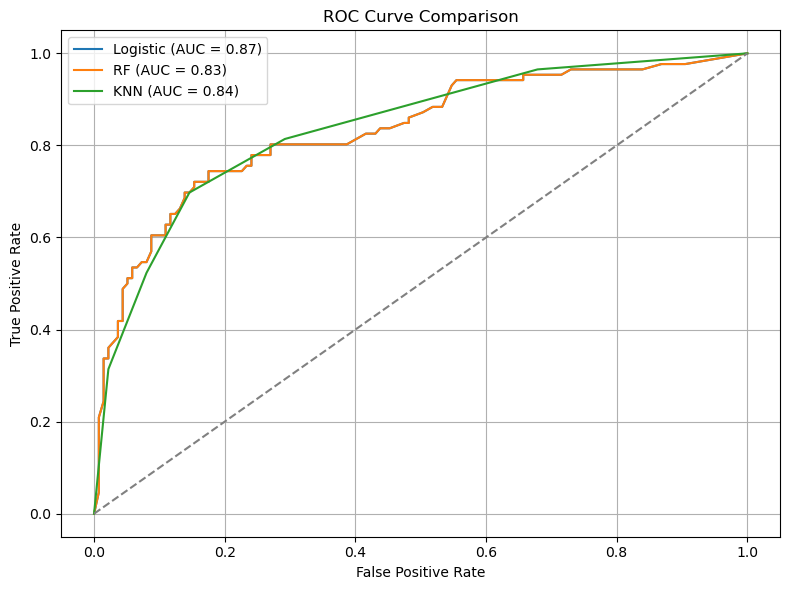

In [48]:
# ROC for Logistic (already computed)
# ROC for Random Forest
y_probs_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# ROC for KNN
y_probs_knn = model_knn.predict_proba(x_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

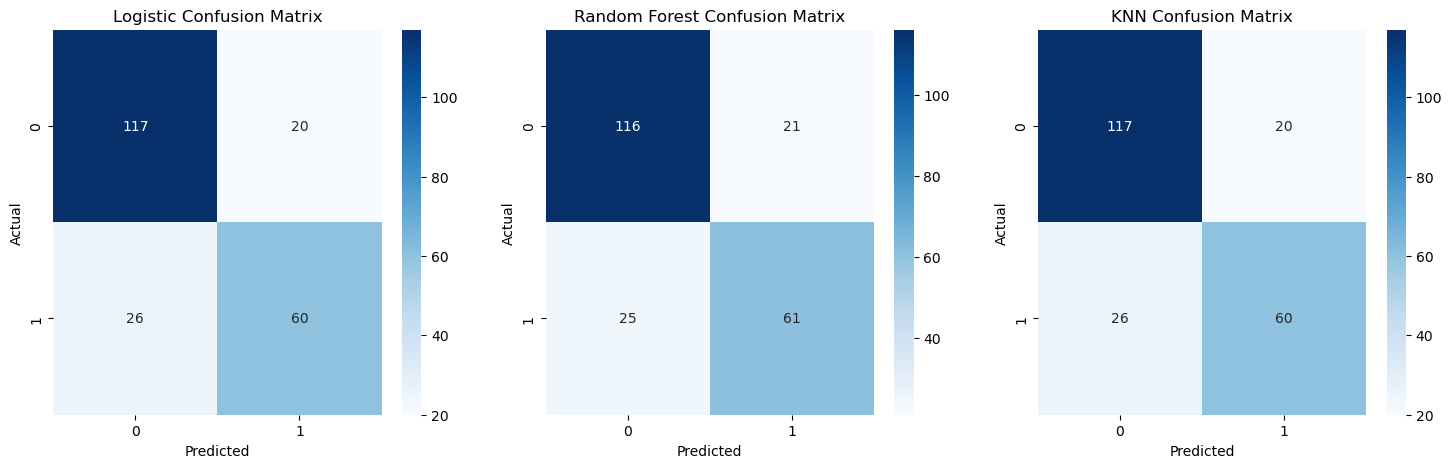

In [50]:
# Predictions for each model
y_pred_lr = model.predict(x_test_scaled)  # Logistic
y_pred_rf = model_rf.predict(X_test)      # RF (unscaled)
y_pred_knn = model_knn.predict(x_test_scaled)  # KNN

# Confusion matrices
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, cm, title in zip(
    axes,
    [confusion_matrix_lr, confusion_matrix_rf, confusion_matrix_knn],
    ['Logistic', 'Random Forest', 'KNN']
):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")